### Group
#### 1. Amit Vikram Singh(111601001)
#### 2. Kuldeep Singh Bhandari(111601009)

### Problem: UCB(Upper Confidence Bound) Algorithm
#### Statement: Given a bandit machine with k arm, an agent pulls one of the k arm and collects the reward. Reward collected after pulling  arm i is coming from a distribution f(i). 
    Aim: Aim is to maximize the total collected reward over a time period.
 **UCB**: One of the most used algorithm to find the optimal method to play bandit game is upper confidence bound algorithm.  UCB works on the approximation from central limit theorem. Suppose till time **t**  arm i is pulled for N_i times and total reward collected from arm i is S_i then CLT says that mean of f(i);mu_i and sample mean avg_i = S_i/N_i are  related by following eqution.
 > **avg_i ** $\in [mu_i - \sqrt{(ln(1/\delta)/2*N_i}\, , mu_i + \sqrt{(ln(1/\delta)/2*N_i)}]$<br/>
 
 > Formally with probablilty 1 - $\delta$ avg_i will belong to the abobe interval.
 
 **Suppose** at any time **t** we want to be confident with probability $1 - \frac{1}{t^2}$. Then put $\delta = \frac{1}{t^2}$  in above equation we finally get 
 > **avg_i ** $\in [mu_i - \sqrt{(ln(t)/N_i}\, , mu_i + \sqrt{(ln(t)/N_i)}]$<br/>
 
 **Finally** with some mathematical manipuation UCB of an arm i at time t is defined as
 > UCB(i) = avg_i + $\sqrt{\frac{2*ln(t)}{N_{i-1}}}$
 
 ##### Algorithm
     1. Pull each arm once for one round and save usb(i)
     2. fot t rounds:
         pull arm with maximum UCB
         update ucb(i)
 

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [140]:
class Graph:
    def __init__(self, arm = 5):
        self.k = arm
        self.n_i = [
            [] for i in range(self.k)]
        self.reward_t = []
        self.regret = []

class Bandit:
    def __init__(self, arm = 5):
        self.k = arm
        self.prob = []
        self.s_i = [0.0 for i in range(arm)]
        self.n_i = [0.0 for i in range(arm)]
        self.graph = Graph(arm)
        
    def initializeProbability(self):
        for arm in range(self.k):
            p = np.random.rand()
            self.prob.append(p)
            
    def ucb(self, arm, t):
        mu = self.s_i[arm]/self.n_i[arm]
        confInterval = 1.0*np.sqrt((2.0*np.log(t))/self.n_i[arm])

        return mu + confInterval
    
    def selectArm(self, t):
        ucb_t = [self.ucb(arm, t) for arm in range(self.k)]
        
        return np.argmax(ucb_t)
            
    def reward(self, arm):
        if(np.random.rand() < self.prob[arm]):
            return 1.0
        return 0.0
    
    def optimalArm(self):
        mu = [self.s_i[i]/self.n_i[i] for i in range(self.k)]
        
        return np.argmax(mu)
    
    def getMU(self, arm):
        return self.s_i[arm]/self.n_i[arm]
    
    def plotUCB(self):
        pass
    
    def plotN_div_T(self, arm):
        pass
    
    def updateGraph(self, totReward, selectedArm):
        self.graph.reward_t.append(totReward)
        for arm in range(self.k):
            if(arm == selectedArm):
                if(len(self.graph.n_i[arm]) == 0):
                    self.graph.n_i[arm].append(1)
                else:
                    self.graph.n_i[arm].append(self.graph.n_i[arm][-1] + 1)
            else:
                if(len(self.graph.n_i[arm]) == 0):
                    self.graph.n_i[arm].append(1)
                else:
                    self.graph.n_i[arm].append(self.graph.n_i[arm][-1])
                   
        if(len(self.graph.regret) == 0):
            self.graph.regret.append(np.max(self.prob) - self.prob[selectedArm])
            
        else:
            self.graph.regret.append(self.graph.regret[-1] + np.max(self.prob) - self.prob[selectedArm])
        
#         print( np.max(self.prob) - self.prob[selectedArm], self.graph.regret[-1], selectedArm)
               
    
#     def plot

[0.22166222059407314, 0.49414062715992324, 0.5095838552853366, 0.08190195006960632, 0.11536800087220178]


Text(0.5,1,'Arm Distribution(Bernouli)')

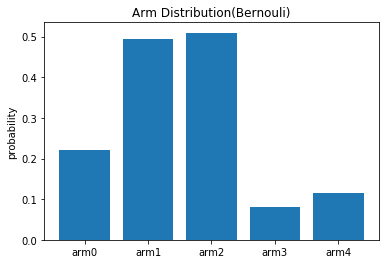

In [141]:
bandit = Bandit(arm = 5)
bandit.initializeProbability()
print(bandit.prob)
plt.bar(["arm" + i for i in list(map(str, np.arange(bandit.k).tolist()))], 
       bandit.prob)
plt.ylabel("probability")
plt.title("Arm Distribution(Bernouli)")

In [142]:
##Initial round
totReward = 0
for arm in range(bandit.k):
    reward = bandit.reward(arm)
    bandit.s_i[arm] = bandit.s_i[arm] + reward
    bandit.n_i[arm] = bandit.n_i[arm] + 1
    
    totReward += reward
    bandit.updateGraph(totReward, arm)

#Update
rounds = 50000
for t in range(1, rounds):
    arm = bandit.selectArm(t)
    reward = bandit.reward(arm)
    bandit.s_i[arm] = bandit.s_i[arm] + reward
    bandit.n_i[arm] = bandit.n_i[arm] + 1.0
    totReward = totReward + reward
    bandit.updateGraph(totReward, arm)

In [143]:
optimalArm = bandit.optimalArm()
optimalMU = bandit.getMU(optimalArm)

print("Optimal Arm = ", optimalArm, " u* = ", optimalMU)

Optimal Arm =  2  u* =  0.5099572487688728


In [144]:
print("Reward collected till {0} rounds from arm_i".format(rounds), bandit.s_i)
print("No of times arm_i was pulled in {0} rounds".format(rounds), bandit.n_i)

Reward collected till 50000 rounds from arm_i [43.0, 6233.0, 18847.0, 3.0, 8.0]
No of times arm_i was pulled in 50000 rounds [206.0, 12649.0, 36958.0, 87.0, 104.0]


### Plot1: 
##### (a) plot of N_i/t vs t i.e fraction of time arm i was selected in interval 1 to t

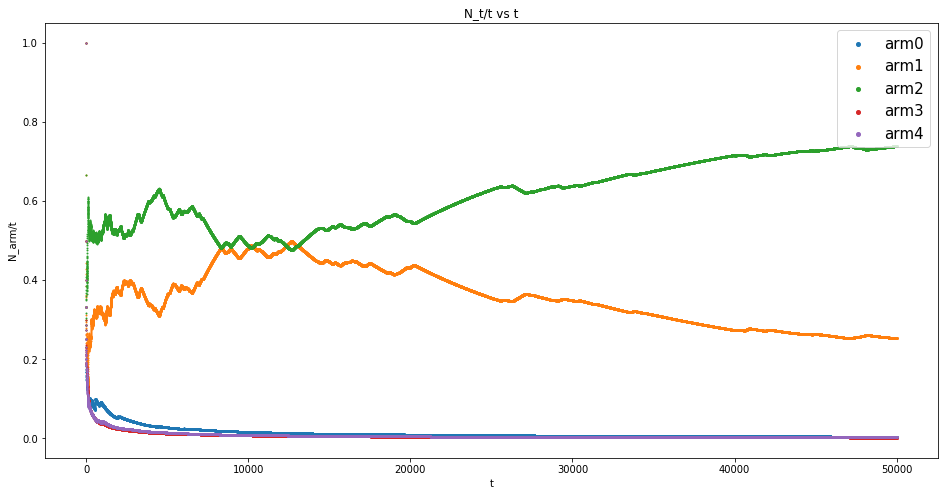

In [145]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(111, ylabel = "N_arm/t", xlabel = "t", title = "N_t/t vs t")
for arm in range(bandit.k):
    temp = [n/t for (n,t) in zip(bandit.graph.n_i[arm], range(1, rounds+bandit.k))]
    ax1.scatter(np.arange(1, rounds+bandit.k), temp, s = 1, label = 'arm'+str(arm))
ax1.legend(loc = 1, markerscale = 4, prop={'size': 15})

>`Inference: We can see the arm with maximum mean(i.e best arm) is selected more frequently as the time passes.

### Plot2: 
##### (a) Plot of Reward(t) vs t
##### (b) Plot of Reward(t)/t vs t

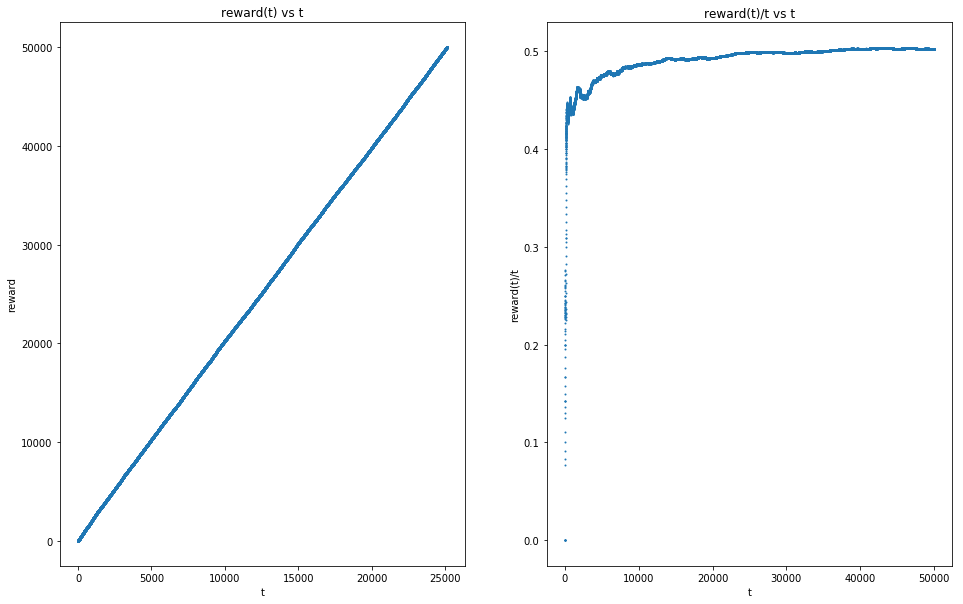

In [146]:
fig = plt.figure(figsize = (16, 10))
ax1 = fig.add_subplot(121, ylabel = 'reward', xlabel = 't', title = 'reward(t) vs t')
ax1.scatter(bandit.graph.reward_t, np.arange(1, rounds + bandit.k), s = 1)

ax2 = fig.add_subplot(122, ylabel = 'reward(t)/t', xlabel = 't', title = 'reward(t)/t vs t')
ax2.scatter( np.arange(1, rounds+bandit.k),
           [r/t for (r, t) in zip(bandit.graph.reward_t, range(1, rounds+bandit.k))], 
           s = 1)

> Expected value of reward i.e. Total Reward/t increases first and after some rounds it becomes constant. It's so because in the beginnig all the arms are pulled  so expected reward is low. As the time passed best arm is pulled more frequently and hence the expected reward starts increasing and after some time it becomes equal to mean of best arm and hence remains constant

### Plot3: 
##### (a) Regret(t) vs t 
##### (b) Regret(t)/t vs t

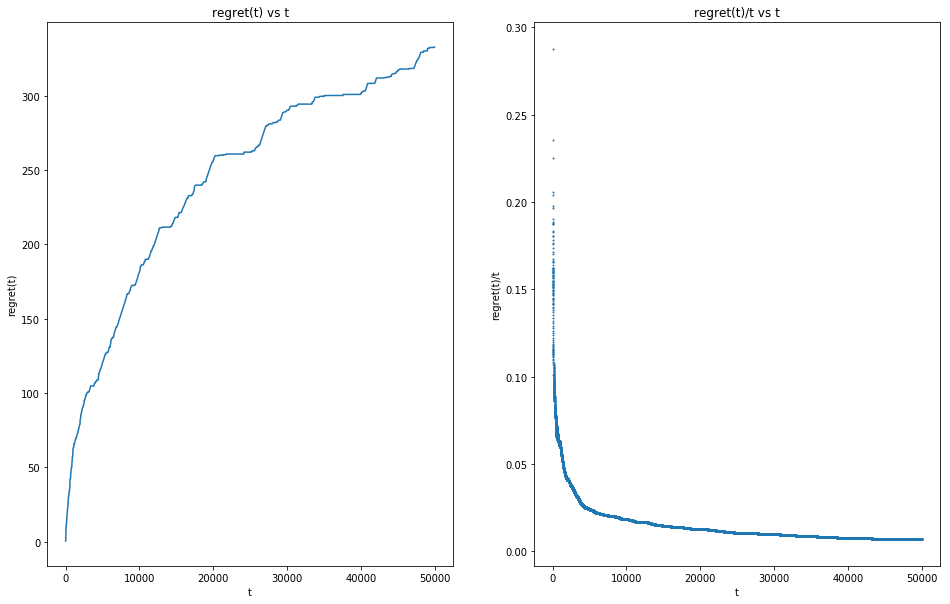

In [147]:
fig = plt.figure(figsize = (16, 10))
ax1 = fig.add_subplot(121, xlabel = 't', ylabel = 'regret(t)', title = "regret(t) vs t")
ax1.plot(np.arange(1, rounds + bandit.k), bandit.graph.regret)

dregret_t = [regret/t for (regret, t) in zip(bandit.graph.regret, 
                                             range(1, rounds + bandit.k))]
ax2 = fig.add_subplot(122, xlabel = 't', ylabel = 'regret(t)/t', title = 'regret(t)/t vs t')
ax2.scatter(np.arange(1, rounds + bandit.k), dregret_t, s = 1)

> Since after some rounds best arm is choses more frequently expected regret decreases.

---